In [56]:
from thetis import*

In [57]:
file_location='outputs/hdf5'

output_dir = 'magnitudes'
create_directory(output_dir)

out_dir_mag_pvd = 'mag_pvd'
create_directory(out_dir_mag_pvd)

mean_max_files = 'mean_max'
create_directory(mean_max_files)

'mean_max'

In [58]:
start_file = 0
t_export = 10
t_end = 3000
t_n = int(t_end/t_export +1)

In [59]:
lx,ly,nx,ny = 1000.,20.,100.,10.
mesh = RectangleMesh(lx,ly,nx,ny)

In [60]:
P1DG_1 = VectorFunctionSpace(mesh, 'DG', 1)
u_v = Function(P1DG_1, name='uv_2d')

In [61]:
P1DG_2 = FunctionSpace(mesh, 'DG', 1)
mag_1 = Function(P1DG_2, name = 'mag')

In [62]:
for i in range(start_file, int(t_end/t_export)+1):
	if COMM_WORLD.rank == 0:
		print ('Reading h5 Files from simulation, file number :', i, 'at time :', i*t_export)
	check_1 = DumbCheckpoint(file_location + '/Velocity2d_{:05}'.format(i), mode=FILE_READ)

	check_1.load(u_v)

	ex_1 = VelocityMagnitudeSolver(mag_1, u_v, 0,  min_val=0, solver_parameters= {'snes_type': 'newtonls'})
	ex_1.solve()
	check_2 = DumbCheckpoint(output_dir + '/Magnitude_{:05}'.format(i), mode = FILE_CREATE)
	check_2.store(mag_1, name='mag')

	#outfile = File(out_dir_mag_pvd + '/Magnitude_{:05}.pvd'.format(i))
	#outfile.write(mag_1)


Reading h5 Files from simulation, file number : 0 at time : 0
Reading h5 Files from simulation, file number : 1 at time : 10
Reading h5 Files from simulation, file number : 2 at time : 20
Reading h5 Files from simulation, file number : 3 at time : 30
Reading h5 Files from simulation, file number : 4 at time : 40
Reading h5 Files from simulation, file number : 5 at time : 50
Reading h5 Files from simulation, file number : 6 at time : 60
Reading h5 Files from simulation, file number : 7 at time : 70
Reading h5 Files from simulation, file number : 8 at time : 80
Reading h5 Files from simulation, file number : 9 at time : 90
Reading h5 Files from simulation, file number : 10 at time : 100
Reading h5 Files from simulation, file number : 11 at time : 110
Reading h5 Files from simulation, file number : 12 at time : 120
Reading h5 Files from simulation, file number : 13 at time : 130
Reading h5 Files from simulation, file number : 14 at time : 140
Reading h5 Files from simulation, file number 

Reading h5 Files from simulation, file number : 126 at time : 1260
Reading h5 Files from simulation, file number : 127 at time : 1270
Reading h5 Files from simulation, file number : 128 at time : 1280
Reading h5 Files from simulation, file number : 129 at time : 1290
Reading h5 Files from simulation, file number : 130 at time : 1300
Reading h5 Files from simulation, file number : 131 at time : 1310
Reading h5 Files from simulation, file number : 132 at time : 1320
Reading h5 Files from simulation, file number : 133 at time : 1330
Reading h5 Files from simulation, file number : 134 at time : 1340
Reading h5 Files from simulation, file number : 135 at time : 1350
Reading h5 Files from simulation, file number : 136 at time : 1360
Reading h5 Files from simulation, file number : 137 at time : 1370
Reading h5 Files from simulation, file number : 138 at time : 1380
Reading h5 Files from simulation, file number : 139 at time : 1390
Reading h5 Files from simulation, file number : 140 at time : 

Reading h5 Files from simulation, file number : 250 at time : 2500
Reading h5 Files from simulation, file number : 251 at time : 2510
Reading h5 Files from simulation, file number : 252 at time : 2520
Reading h5 Files from simulation, file number : 253 at time : 2530
Reading h5 Files from simulation, file number : 254 at time : 2540
Reading h5 Files from simulation, file number : 255 at time : 2550
Reading h5 Files from simulation, file number : 256 at time : 2560
Reading h5 Files from simulation, file number : 257 at time : 2570
Reading h5 Files from simulation, file number : 258 at time : 2580
Reading h5 Files from simulation, file number : 259 at time : 2590
Reading h5 Files from simulation, file number : 260 at time : 2600
Reading h5 Files from simulation, file number : 261 at time : 2610
Reading h5 Files from simulation, file number : 262 at time : 2620
Reading h5 Files from simulation, file number : 263 at time : 2630
Reading h5 Files from simulation, file number : 264 at time : 

In [63]:
for i in range(start_file, int(t_end/t_export)+1):
	if COMM_WORLD.rank == 0:
		print ('Reading h5 Files from output of mag_vel, file number :', i, 'at time :', i*t_export)
	check_1 = DumbCheckpoint(output_dir + '/Magnitude_{:05}'.format(i), mode=FILE_READ)
	check_1.load(mag_1)
	f1 = np.empty_like(mag_1.dat.data)
	f1[:] = mag_1.dat.data[:]
	mag_data_set = np.empty((t_n, mag_1.dat.data.shape[0]))
	mag_data_set[i, :] = f1[:]

Reading h5 Files from output of mag_vel, file number : 0 at time : 0
Reading h5 Files from output of mag_vel, file number : 1 at time : 10
Reading h5 Files from output of mag_vel, file number : 2 at time : 20
Reading h5 Files from output of mag_vel, file number : 3 at time : 30
Reading h5 Files from output of mag_vel, file number : 4 at time : 40
Reading h5 Files from output of mag_vel, file number : 5 at time : 50
Reading h5 Files from output of mag_vel, file number : 6 at time : 60
Reading h5 Files from output of mag_vel, file number : 7 at time : 70
Reading h5 Files from output of mag_vel, file number : 8 at time : 80
Reading h5 Files from output of mag_vel, file number : 9 at time : 90
Reading h5 Files from output of mag_vel, file number : 10 at time : 100
Reading h5 Files from output of mag_vel, file number : 11 at time : 110
Reading h5 Files from output of mag_vel, file number : 12 at time : 120
Reading h5 Files from output of mag_vel, file number : 13 at time : 130
Reading h5 Fi

Reading h5 Files from output of mag_vel, file number : 161 at time : 1610
Reading h5 Files from output of mag_vel, file number : 162 at time : 1620
Reading h5 Files from output of mag_vel, file number : 163 at time : 1630
Reading h5 Files from output of mag_vel, file number : 164 at time : 1640
Reading h5 Files from output of mag_vel, file number : 165 at time : 1650
Reading h5 Files from output of mag_vel, file number : 166 at time : 1660
Reading h5 Files from output of mag_vel, file number : 167 at time : 1670
Reading h5 Files from output of mag_vel, file number : 168 at time : 1680
Reading h5 Files from output of mag_vel, file number : 169 at time : 1690
Reading h5 Files from output of mag_vel, file number : 170 at time : 1700
Reading h5 Files from output of mag_vel, file number : 171 at time : 1710
Reading h5 Files from output of mag_vel, file number : 172 at time : 1720
Reading h5 Files from output of mag_vel, file number : 173 at time : 1730
Reading h5 Files from output of mag_ve

Reading h5 Files from output of mag_vel, file number : 276 at time : 2760
Reading h5 Files from output of mag_vel, file number : 277 at time : 2770
Reading h5 Files from output of mag_vel, file number : 278 at time : 2780
Reading h5 Files from output of mag_vel, file number : 279 at time : 2790
Reading h5 Files from output of mag_vel, file number : 280 at time : 2800
Reading h5 Files from output of mag_vel, file number : 281 at time : 2810
Reading h5 Files from output of mag_vel, file number : 282 at time : 2820
Reading h5 Files from output of mag_vel, file number : 283 at time : 2830
Reading h5 Files from output of mag_vel, file number : 284 at time : 2840
Reading h5 Files from output of mag_vel, file number : 285 at time : 2850
Reading h5 Files from output of mag_vel, file number : 286 at time : 2860
Reading h5 Files from output of mag_vel, file number : 287 at time : 2870
Reading h5 Files from output of mag_vel, file number : 288 at time : 2880
Reading h5 Files from output of mag_ve

In [64]:
mean_mag = []
max_mag = []
min_mag = []

for i in range(mag_data_set.shape[1]):
	vel_mag = mag_data_set[:, i]
	mean_mag.append(np.mean(vel_mag))#, dtype=np.float64))
	max_mag.append(np.max(vel_mag))#, dtype=np.float64))
	min_mag.append(np.min(vel_mag))#, dtype=np.float64))

In [65]:
vel_mean = Function(P1DG_2, name='mean_velocity')
vel_mean.dat.data[:] = mean_mag[:]
chk_1 = DumbCheckpoint(mean_max_files + '/mean_velocity', mode=FILE_CREATE)
chk_1.store(vel_mean)
outfile2 = File(mean_max_files + '/mean_velocity.pvd')
outfile2.write(vel_mean)

In [66]:
vel_max = Function(P1DG_2, name='max_velocity')
vel_max.dat.data[:] = max_mag[:]
chk_2 = DumbCheckpoint(mean_max_files + '/max_velocity', mode=FILE_CREATE)
chk_2.store(vel_max)
outfile2 = File(mean_max_files + '/max_velocity.pvd')
outfile2.write(vel_max)

In [67]:
np.shape(vel_mean.dat.data)

(120000,)

In [68]:
np.shape(mag_1.dat.data)

(120000,)

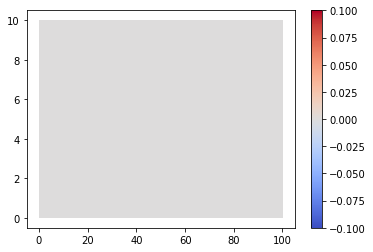

In [69]:
%matplotlib inline
plot(vel_mean)